In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labesl),(test_images,test_labes) = keras.datasets.fashion_mnist.load_data()

In [3]:
    train_images = train_images/255.0
    test_images = test_images/255.0

    train_images = train_images.reshape(train_images.shape[0],28,28,1)
    test_images = test_images.reshape(test_images.shape[0],28,28,1)


In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation ='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation ='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])



In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labesl, epochs=10, validation_data=(test_images, test_labes))

Epoch 1/10


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 46s 23ms/step - loss: 0.4500 - accuracy: 0.8374 - val_loss: 0.3463 - val_accuracy: 0.8766
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3018 - accuracy: 0.8899 - val_loss: 0.3042 - val_accuracy: 0.8899
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2565 - accuracy: 0.9043 - val_loss: 0.2707 - val_accuracy: 0.9008
Epoch 4/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2259 - accuracy: 0.9172 - val_loss: 0.2625 - val_accuracy: 0.9010
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1973 - accuracy: 0.9265 - val_loss: 0.2588 - val_accuracy: 0.9061
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1748 - accuracy: 0.9340 - val_loss: 0.2458 - val_accuracy: 0.9119
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1549 - accuracy: 0.9416 - val_loss: 0.2454 - val_accura

In [26]:
test_loss, test_accuracy = model.evaluate(test_images, test_labes, verbose=2)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

313/313 - 2s - loss: 0.3096 - accuracy: 0.9084 - 2s/epoch - 7ms/step
Test accuracy: 90.84%


In [53]:
class_names=['Pullover','Coat','Bag','Ankle boot','Trouser','T-shirt/top']

1/1 [==============================] - 0s 39ms/step


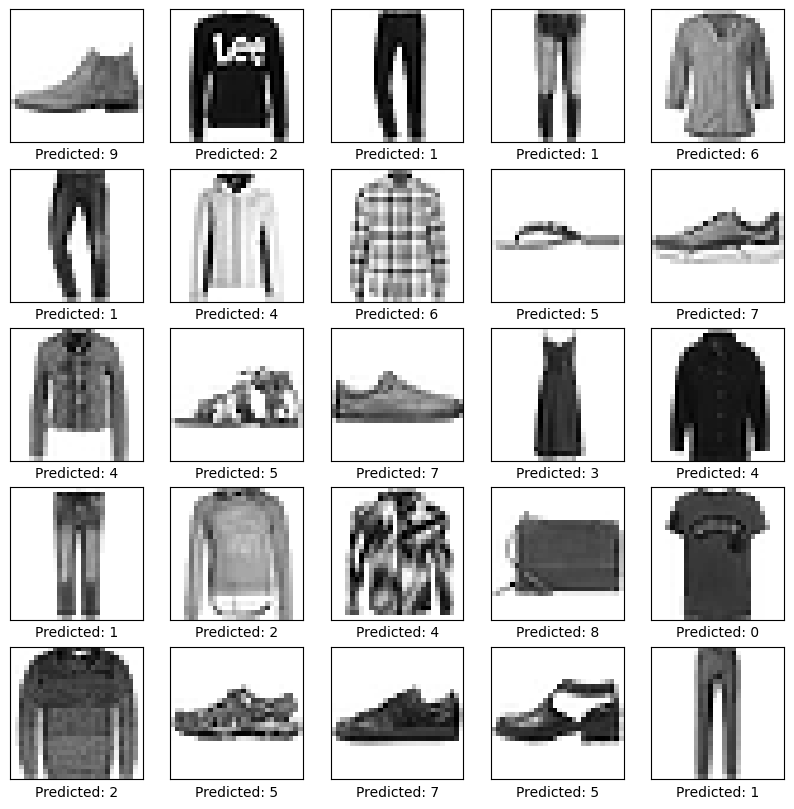

In [55]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    
    # Make predictions on test images
    predictions = model.predict(test_images[i].reshape(1, 28, 28, 1))
    predicted_label = tf.argmax(predictions, axis=1).numpy()[0]
    
    # Display the predicted label
    plt.xlabel(f'Predicted: {predicted_label}')
    
plt.show()